# Analytics Snippet: In the Library

By Jacky Poon

*This article was originally published on [Actuaries Digital](https://www.actuaries.digital/2018/06/14/analytics-snippet-in-the-library/), the magazine of the Actuaries Institute Australia, on 14 June 2018 as "Analytics Snippet: In the Library"

Whether you are a complete beginner or an experienced practitioner, we hope you can learn a trick or two from this column.

In this snippet we will be diving into checkouts of book titles – from the Brisbane City Council Library and its branches during three days in December – to see what Brisbanians have been reading!

### <font color='blue'>Libraries and Packages</font>

In R, we will be using:
- plotly for the pie charts,
- dplyr for data manipulation,
- tm for text mining,
- wordcloud for word clouds, and
- RColorBrewer for a touch of colour.


- library("plotly"),
- library("dplyr"),
- library("tm"),
- library("wordcloud"),
- library("RColorBrewer").

If you do not have these packages installed previously, you will need to run install.packages to install th (e.g. install.packages(“plotly”))

### <font color='blue'>Reading the Data</font>

The data used for this can be downloaded from the [Brisbane City Open Data Portal](https://www.data.brisbane.qld.gov.au/data/dataset/library-checkouts-branch-date), which is publicly available under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/).

First, in R, we provision a temporary file location for the download, and then download the zip file to the location:

temp->tempfile();

download.file("https://www.data.brisbane.qld.gov.au/data/dataset/53d02339-1818-43df-9845-83808e5e247e/resource/ed431a68-15f2-430e-b140-4c603597680a/download/library-checkouts-all-branches-december-2017.csv.zip")

We then unzip and read the data from the comma separated values file.

data <- read.csv(unz(temp, "Library Checkouts all Branches December 2017.csv")) 
Inspecting the data to show the first 100 records with head(), we have title, author, item type, age, and the library branch it was checked out from, as well as various IDs. Click on the arrow on the top right to see more columns.

head(data, n=100)

<div>
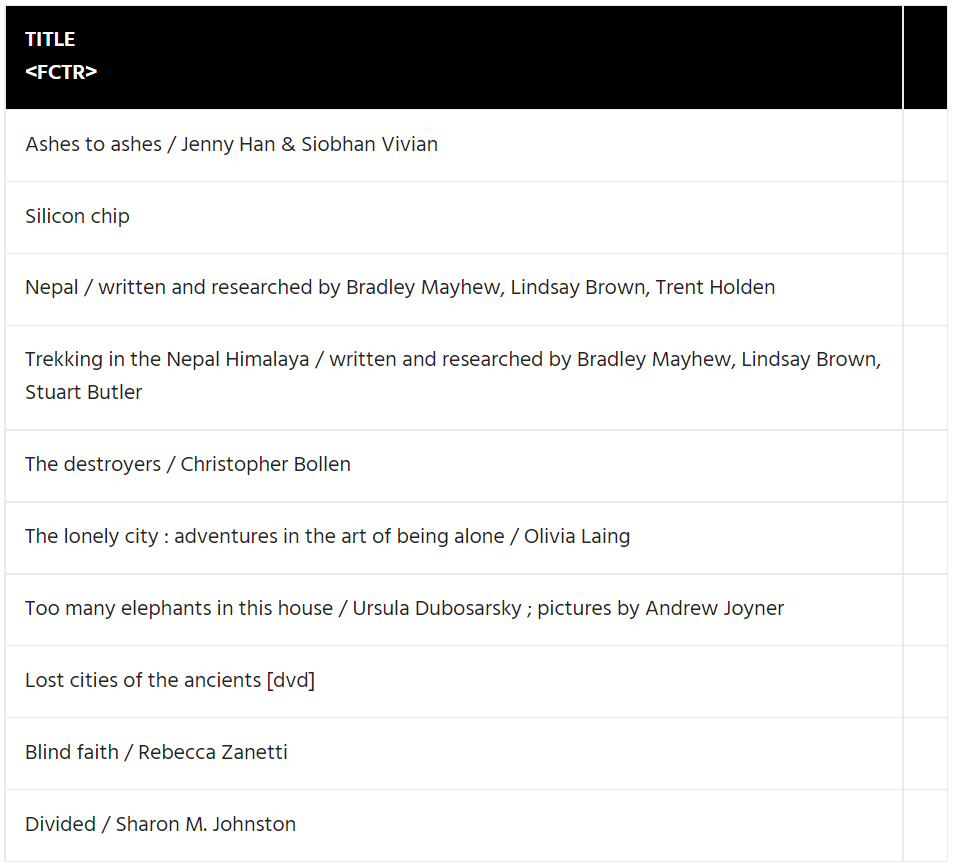
</div>

There is a language column, but it has many blanks and “UNKNOWN” values so that does not appear to be very useful.

### <font color='blue'>What sort of items are being checked out?</font>

It appears that Age and Item.type fields may shed some light on the types of material being borrowed, so we will create some charts by those dimensions.

To create charts in R we typically need to specify the details of the chart design in code, including:

- data source (in this case, counts of data by Age and Item.type respectively),
- X axis,
- Y axis,
- labels,
- positioning, and
- any other formatting

This makes it less user friendly than a drag-and-drop tool like Excel or Tableau initially. However it does offer transparency, the ability to automate, and the choice of many different charting packages with their own strengths that can all be used in the one R document together with other analysis logic.

First we will plot a summary of the count of items by Age in a simple bar chart:

plot_ly(data=count(data, Age), x = ~Age, y = ~n, type = 'bar')


<div>
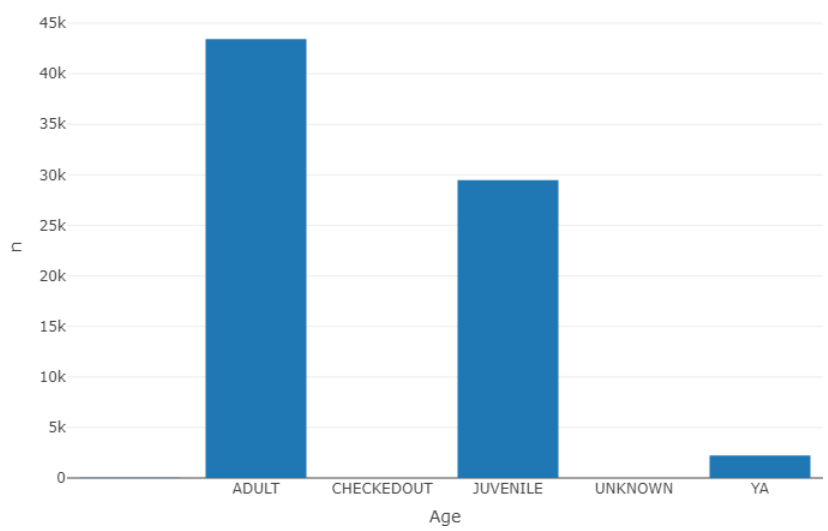
</div>

We see that children’s literature seems to be quite popular, with 39% of items being from the “Juvenile” category.

The second chart is the much maligned pie chart, setting the data to be a count by Item.Type.

plot_ly(data=count(data, Item.type), labels = ~Item.type, values= ~n, type = 'pie', textinfo = 'label+percent')


<div>
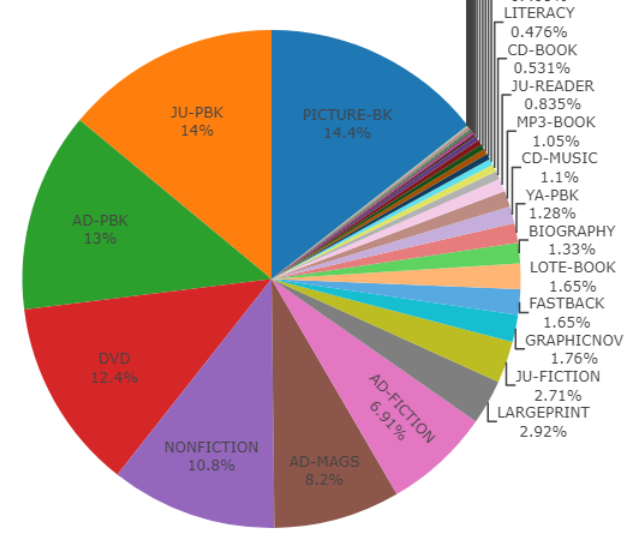
</div>

Although one might commonly associate libraries with books, 12% of check outs from Brisbane libraries are media items such as DVDs.

It also becomes apparent the data is not perfect – if you mouse over the interactive plot carefully, there are two items of type “2017” which seems to be a data issue.

### <font color='blue'>Titles</font>

Finally, we will wrap up with a word cloud to visualise the content borrowed over the pre-holiday period.

Some data cleaning is required. It appears from the earlier data inspection that many titles also include the author after a slash, so first we will strip out the section before the slash to obtain the real title.

After converting to a “corpus” dataset of words, we use the “tm” text mining package to clean the data to only include meaningful words, and not the following:

1. Numeric digits 0-9 and,
2. Stop words, which are common English words such as “a” and “the” – otherwise they would dominate the word cloud over meaningful words,
3. Media types such as “dvd” – many titles have e.g. “[dvd]” in title, but having analysed item type earlier we want to focus now on the content,
4. And formatting such as punctuation and extra white spaces.

The operations are chained together using dplyr’s pipe operator (%>%).

titles_corpus <- sapply(strsplit(as.character(data$Title), "/"), `[`, 1) %>%   
  VectorSource() %>%                                                           
  Corpus() %>%                                                                 
  tm_map(content_transformer(tolower)) %>%                                     
  tm_map(removeNumbers) %>%                                                    
  tm_map(removeWords, stopwords("english")) %>%                                
  tm_map(removeWords, c("dvd", "book", "sound", "recording", "novel")) %>%
  tm_map(removePunctuation) %>% 
  tm_map(stripWhitespace)

We can then generate the word cloud.

wordcloud(titles_corpus, max.words = 100, scale = c(5, 0.5), random.order = FALSE, colors=brewer.pal(8, "Dark2"))

<div>
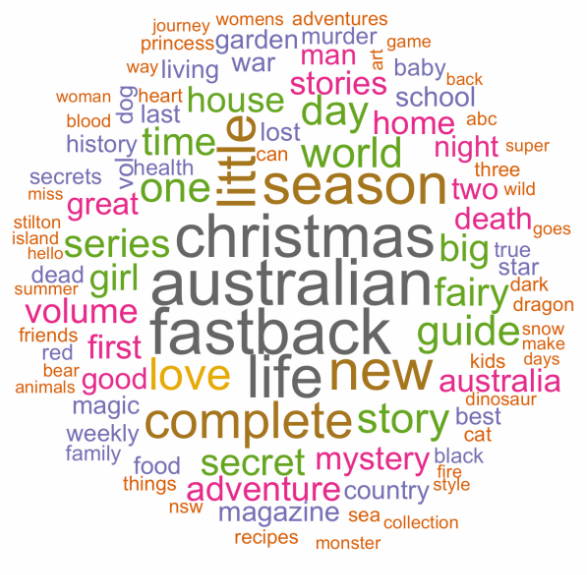
</div>

Reviewing this visualisation, some key insights would be that Australia appears to be a popular topic for reading, and Christmas titles unsurprisingly feature prominently for the month of December.

### <font color = 'blue'>Call for more snippets<font>

This concludes our trip to the library for now. We are looking to run this as a regular column, so if you have an idea for a cool visualisation, an interesting model, we would like to hear from you! Please send them in to ActuariesMag@actuaries.asn.au.